<a href="https://colab.research.google.com/github/AndreaZerimar/AndreaZerimar/blob/main/AE_1HW_OCT2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wavelength at max. intensity for CS:= 16449.81716558637
Wavelength at max. intensity for Sun: 8837.856709413822

Now if we compute this max but with the Wien's Law:
Max for Carbon Star: 16460.99567075814 Angstrom / K
Max for Sun: 8843.86249208843 Angstrom / K

We can see that there are some differences between the numbers of exercise
a) and b) but in my opinion they do not represent a problem, I suppose
that this differences are due to the calculation with Wien's constant.



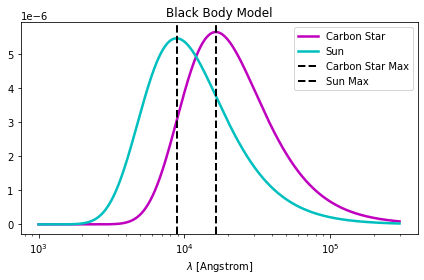

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody
import astropy.units as u

wavelengths = np.logspace(np.log10(1000), np.log10(3e5), num=1000) * u.AA

#Entrada de variables
temperatureC = 3100 * u.K
temperatureS = 5770 * u.K

#BlackBody proporciona resultados en ergios/(cm^2 Hz s sr) cuando la escala no tiene unidades
bbC = BlackBody(temperature=temperatureC, scale=1)
bb_resultC = bbC(wavelengths)

bbS = BlackBody(temperature=temperatureS, scale=0.15)
bb_resultS = bbS(wavelengths)


fig, ax = plt.subplots(ncols=1)
ax.plot(wavelengths, bb_resultC, color='m', linewidth=2.5, linestyle="-", label="Carbon Star")
ax.plot(wavelengths, bb_resultS, color='c', linewidth=2.5, linestyle="-", label="Sun")

ax.set_xscale('log')
ax.set_xlabel(fr"$\lambda$ [{wavelengths.unit}]"), (fr"$F(\lambda)$ [{bb_resultC.unit}]")
ax.set_xlabel(fr"$\lambda$ [{wavelengths.unit}]"), (fr"$F(\lambda)$ [{bb_resultS.unit}]")

plt.rcParams["figure.autolayout"] = True

plt.axvline(bbC.nu_max.to(u.AA, equivalencies=u.spectral()).value, linewidth=2, color='k', linestyle="--", label="Carbon Star Max")
plt.axvline(bbS.nu_max.to(u.AA, equivalencies=u.spectral()).value, linewidth=2, color='k', linestyle="--", label="Sun Max")

Cmax= bbC.nu_max.to(u.AA, equivalencies=u.spectral()).value
Smax= bbS.nu_max.to(u.AA, equivalencies=u.spectral()).value

#Ley de Wien, con la constante ya definida pero con el cambio a lambda. 
cteWCS = 5.879*10**(10)*temperatureC  * u.Hz
WLCS = (3*10**(8)*u.Hz/cteWCS/1e-10* u.AA)

cteWS = 5.879*10**(10)*temperatureS  * u.Hz
WLS = (3*10**(8)*u.Hz/cteWS/1e-10* u.AA)


#Impresión de Datos
print('Wavelength at max. intensity for CS:=', Cmax)
print('Wavelength at max. intensity for Sun:', Smax)
print()
print('Now if we compute this max but with the Wien\'s Law:' )
print('Max for Carbon Star:', WLCS)
print('Max for Sun:', WLS)
print()
print('We can see that there are some differences between the numbers of exercise')
print('a) and b) but in my opinion they do not represent a problem, I suppose')
print('that this differences are due to the calculation with Wien\'s constant.')
print()


#Grafica:
plt.legend()

plt.title(r'Black Body Model')
plt.tight_layout()

plt.savefig("BB-S-C-HW1-AE.png", dpi=1000)